In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import joblib

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
#  Load datasets
true_df = pd.read_csv("True.csv")
fake_df = pd.read_csv("Fake.csv")

# Add labels
true_df["label"] = 1   # Real
fake_df["label"] = 0   # Fake

# Combine both
df = pd.concat([true_df, fake_df], axis=0).reset_index(drop=True)
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (44898, 5)


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


label
0    23481
1    21417
Name: count, dtype: int64


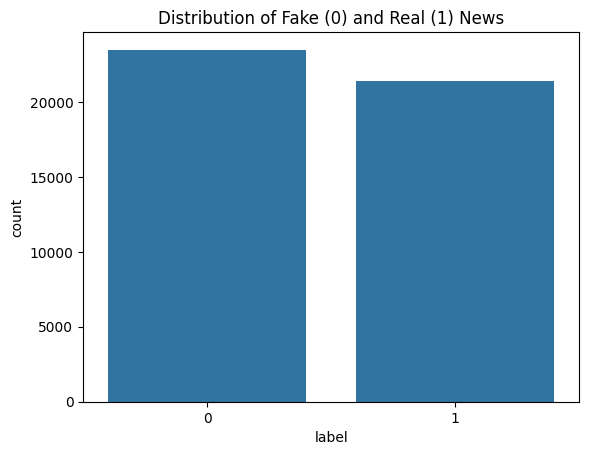

title      0
text       0
subject    0
date       0
label      0
dtype: int64


In [3]:
# Quick EDA
print(df['label'].value_counts())
sns.countplot(x='label', data=df)
plt.title("Distribution of Fake (0) and Real (1) News")
plt.show()

# Check for missing values
print(df.isnull().sum())

In [4]:
df['content'] = df['title'] + " " + df['text']
df = df[['content', 'label']]
df.head()

,content,label
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


In [5]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [6]:
# Cell 5: Clean text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'[^a-z\s]', ' ', text)
    tokens = nltk.word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words and len(t) > 1]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return ' '.join(tokens)

df['clean'] = df['content'].apply(clean_text)
df.head()

,content,label,clean
0,"As U.S. budget fight looms, Republicans flip t...",1,budget fight loom republican flip fiscal scrip...
1,U.S. military to accept transgender recruits o...,1,military accept transgender recruit monday pen...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1,senior republican senator let mr mueller job w...
3,FBI Russia probe helped by Australian diplomat...,1,fbi russia probe helped australian diplomat ti...
4,Trump wants Postal Service to charge 'much mor...,1,trump want postal service charge much amazon s...


In [7]:
# Cell 6: Train-test split
X = df['clean']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (35918,)
Test size: (8980,)


In [8]:
# Cell 7: TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

joblib.dump(tfidf, "tfidf_vectorizer.joblib")
print("TF-IDF vectorizer saved.")

TF-IDF vectorizer saved.


In [9]:
# Cell 8: Train Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9891982182628062
F1 Score: 0.9887117421156756

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



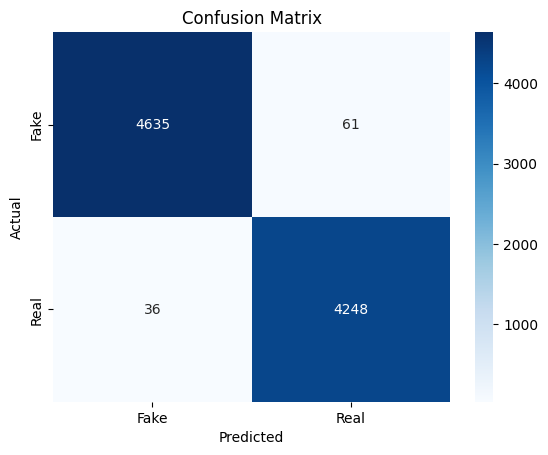

In [10]:
# Cell 9: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake','Real'], yticklabels=['Fake','Real'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [11]:
# Cell 10: Save trained model
joblib.dump(model, "news_classifier_model.joblib")
print("Model saved successfully!")

Model saved successfully!


In [12]:
# Cell 11: Test prediction
def predict_news(text):
    clean = clean_text(text)
    vec = tfidf.transform([clean])
    pred = model.predict(vec)[0]
    prob = model.predict_proba(vec)[0].max()
    label = "Real" if pred == 1 else "Fake"
    return label, round(prob, 3)

sample_text = "The Prime Minister announced a new education policy today."
print(predict_news(sample_text))

('Real', np.float64(0.527))
